### Load MNIST from class

In [1]:
import torch
import torch.nn as nn
# import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm

from dataloader import MNISTDataLoader
from models import CNN_ours

In [2]:
my_data = MNISTDataLoader()
train_loader = my_data._load_train()
net = CNN_ours()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [3]:
len(train_loader)

1875

In [4]:
1875 * 32

60000

In [5]:
BATCH_SIZE = my_data._batch_size()
LOSS = []
num_of_batches = len(train_loader) // BATCH_SIZE

In [9]:
for epoch in tqdm(range(10)):
    running_loss = 0
    # for batch_idx, (images, labels) in enumerate(dataloader):
    for batch_idx, (images, labels) in enumerate(train_loader):
        # print(batch_idx)
        optimizer.zero_grad()

        outputs = net(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    LOSS.append(running_loss / num_of_batches)

100%|██████████| 10/10 [07:21<00:00, 44.17s/it]


In [10]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Training loss')

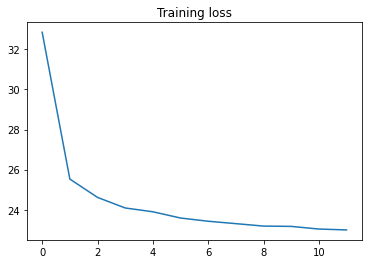

In [12]:
plt.plot(LOSS)
plt.title('Training loss')

In [13]:
# access model 
net.state_dict().keys()

odict_keys(['conv1.weight', 'conv1.bias', 'conv2.weight', 'conv2.bias', 'fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias'])

In [18]:
# access model params
net.state_dict()['conv1.weight'].shape

torch.Size([10, 1, 5, 5])

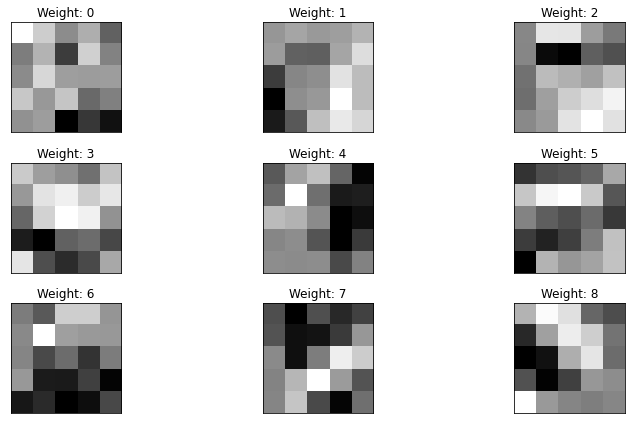

In [27]:
fig = plt.figure(figsize=(12, 6))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(net.state_dict()['conv1.weight'][i].permute(-2, -1, 0), cmap='gray')
    plt.title('Weight: {}'.format(i),  fontsize = 12)
    plt.xticks([])
    plt.yticks([])
fig.tight_layout()
plt.show()

### Old code

In [ ]:
examples = enumerate(train_loader)
batch_idx, (images, labels) = next(examples)
# images is the whole batch, so 32 x 1 x 28 x28

BATCH_SIZE = images.shape[0]

new_img = torch.cat((images[0], images[1], images[2]), dim=0)
plt.imshow(new_img.permute(1,2,0))
plt.show()

new_new_img = new_img[1]
plt.imshow(new_new_img)
plt.show()

In [ ]:
fig = plt.figure(figsize=(12, 6))

for i in range(BATCH_SIZE):
    plt.subplot(4,8,i+1)
    plt.imshow(images[i][0], cmap='gray', interpolation=None)
    plt.title('Ground Truth: {}'.format(labels[i]), fontsize = 6)
    plt.xticks([])
    plt.yticks([])
fig.tight_layout()
plt.show()